In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
titanic_df = pd.read_csv('titanic_toy.csv')

In [15]:
titanic_df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [17]:
titanic_df.head(10)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,4,0
8,27.0,11.1333,2,1
9,14.0,30.0708,1,1


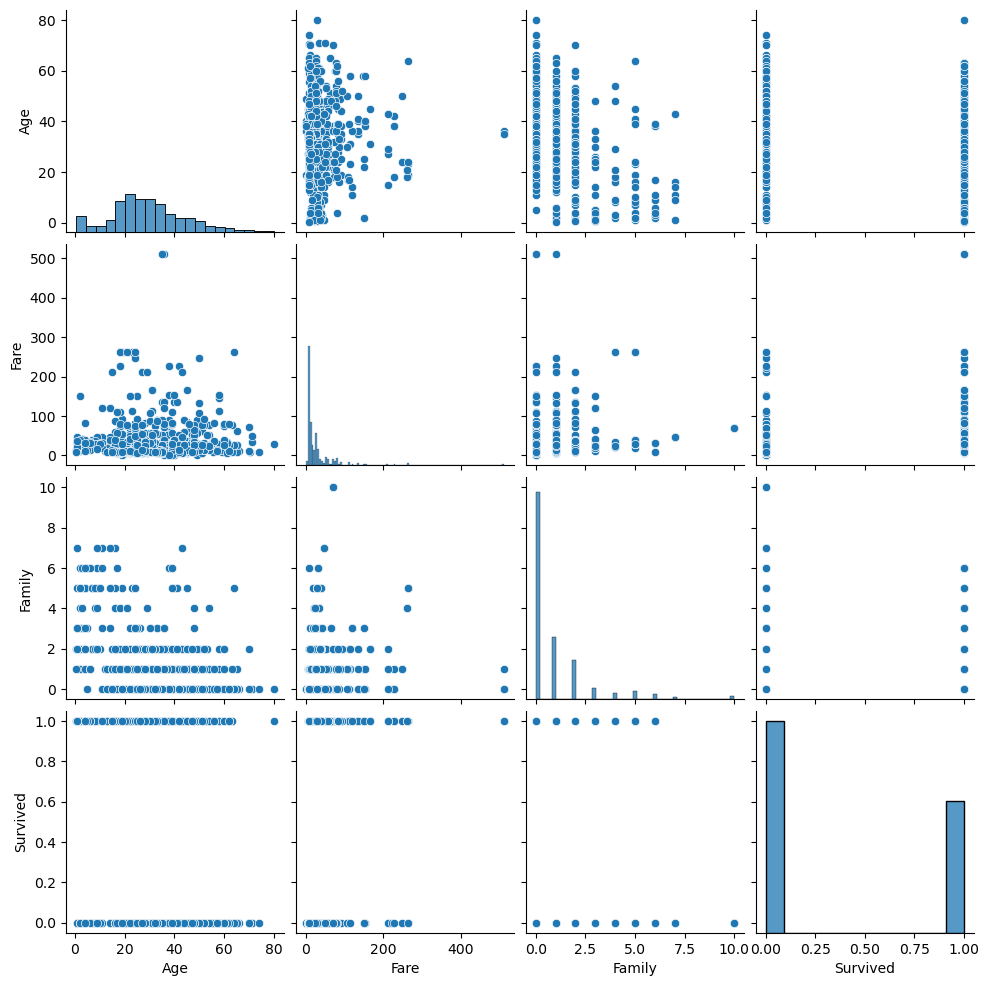

In [19]:
sns.pairplot(titanic_df)


In [27]:
Y = titanic_df.drop(['Age', 'Fare', 'Family'], axis=1)

In [29]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
X = titanic_df.drop(['Survived'], axis=1)

In [33]:
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [35]:
X.shape

(891, 3)

In [37]:
Y.shape

(891, 1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size= 0.25)

In [47]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.2 MB 11.1 MB/s eta 0:00:35
   ---------------------------------------- 1.4/385.2 MB 14.9 MB/s eta 0:00:26
   ---------------------------------------- 3.2/385.2 MB 22.5 MB/s eta 0:00:18
    --------------------------------------- 5.2/385.2 MB 30.2 MB/s eta 0:00:13
    --------------------------------------- 7.0/385.2 MB 30.0 MB/s eta 0:00:13
    --------------------------------------- 8.8/385.2 MB 31.3 MB/s eta 0:00:13
   - -------------------------------------- 11.0/385.2 MB 38.5 MB/s eta 0:00:10
   - -------------------------------------- 13.4/385.2 MB 43.5 MB/s eta 0:00:09
   - -------------------------------------- 15.3/385.2 MB 40.9 MB/s eta 0:00:10
   - -------------------------------------- 17.4/385.2 MB 43.7 

In [172]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(10, activation='relu')) # layer 1
model.add(Dense(10, activation='relu')) # layer 2
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [176]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20


C:\Users\shail\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 

C:\Users\shail\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e

In [178]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


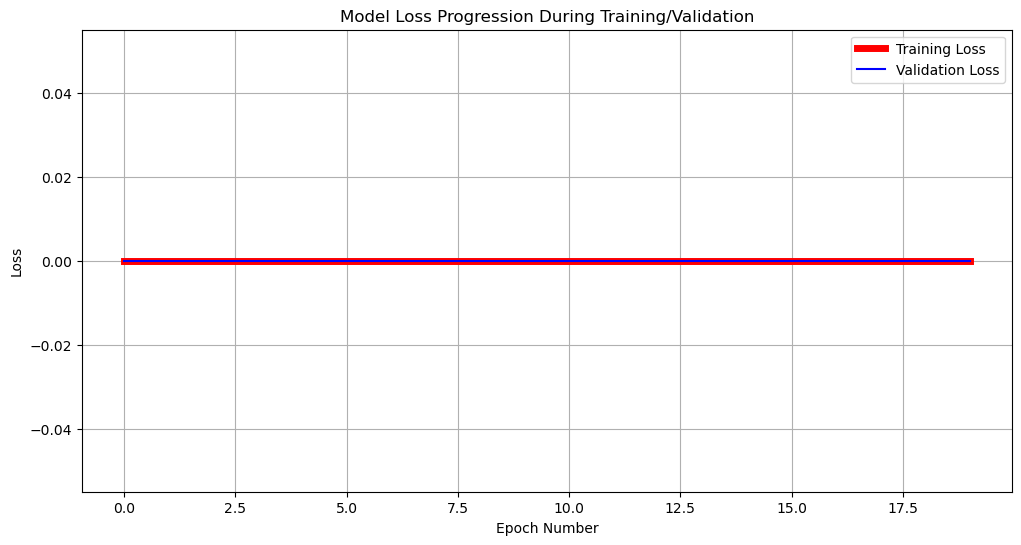

In [180]:

plt.figure(figsize=(12, 6))
plt.plot(epochs_hist.history['loss'], label='Training Loss', color='red', linestyle='-', linewidth=5)
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
print(epochs_hist.history.keys())
print(epochs_hist.history['loss'][:10])  # Print the first 10 entries to check


dict_keys(['loss', 'val_loss'])
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


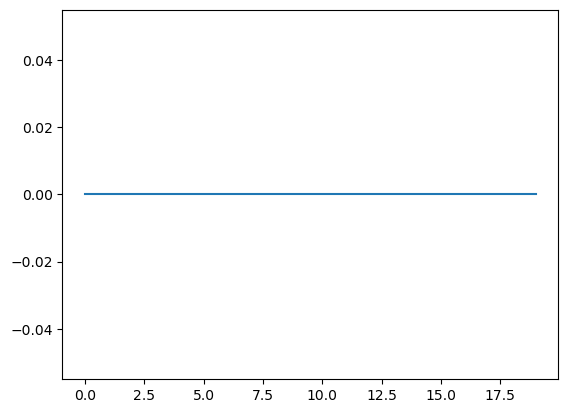

In [130]:
plt.plot(epochs_hist.history['loss'], label='Training Loss')

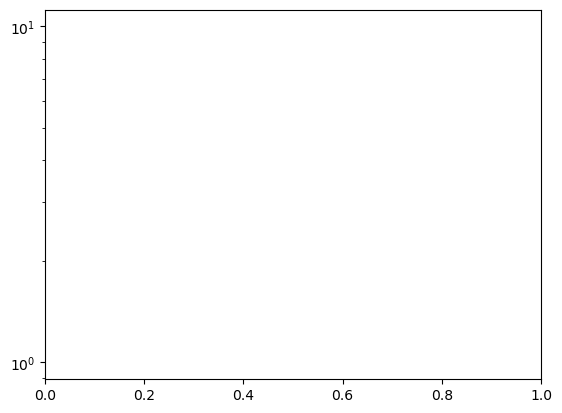

In [144]:
plt.yscale('log')  # Optional: Use log scale for better visualization


In [138]:
plt.show()


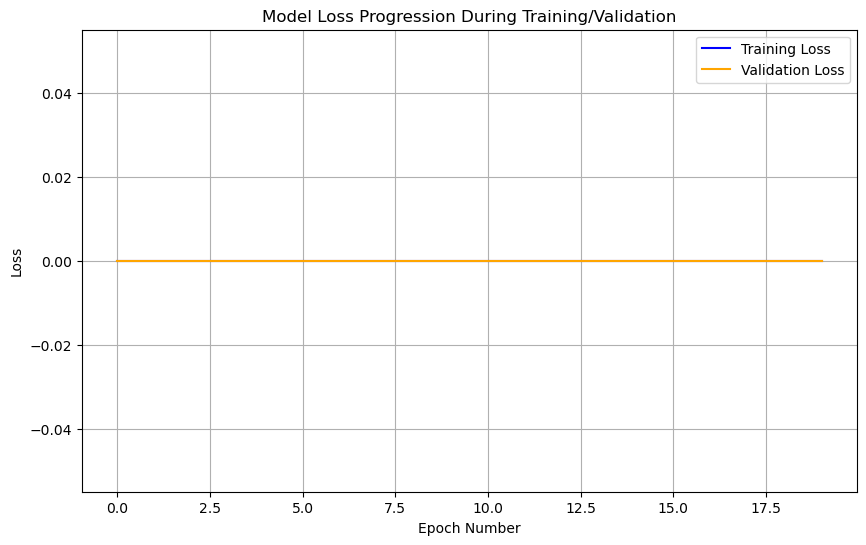

In [150]:
import matplotlib.pyplot as plt

# Assuming epochs_hist is your history object
plt.figure(figsize=(10, 6))

# Plot training loss
if 'loss' in epochs_hist.history:
    plt.plot(epochs_hist.history['loss'], label='Training Loss', color='blue')
else:
    print("Training loss data is not available")

# Plot validation loss
if 'val_loss' in epochs_hist.history:
    plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='orange')
else:
    print("Validation loss data is not available")

# Add title and labels
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()

# Optional: Add grid for better readability
plt.grid(True)

# Show plot
plt.show()


In [152]:
import numpy as np
losses = np.array(epochs_hist.history['loss'])
print(np.isnan(losses).any())  # Check for NaN values
print(np.isinf(losses).any())  # Check for infinite values


False
False


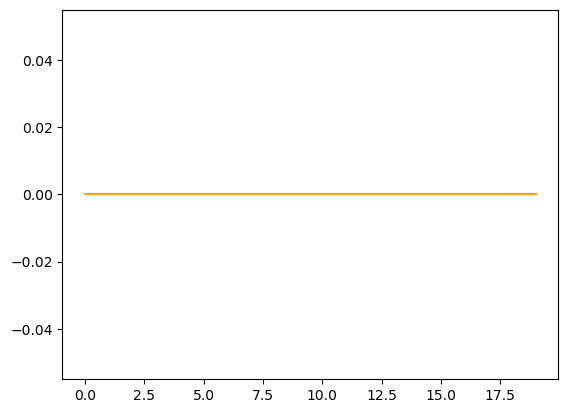

In [154]:
plt.plot(epochs_hist.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='orange')


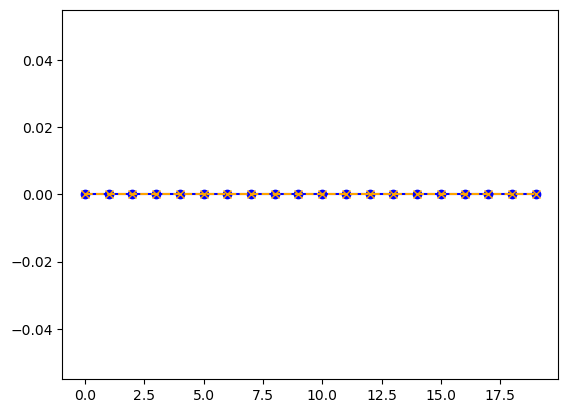

In [156]:
plt.plot(epochs_hist.history['loss'], label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x')


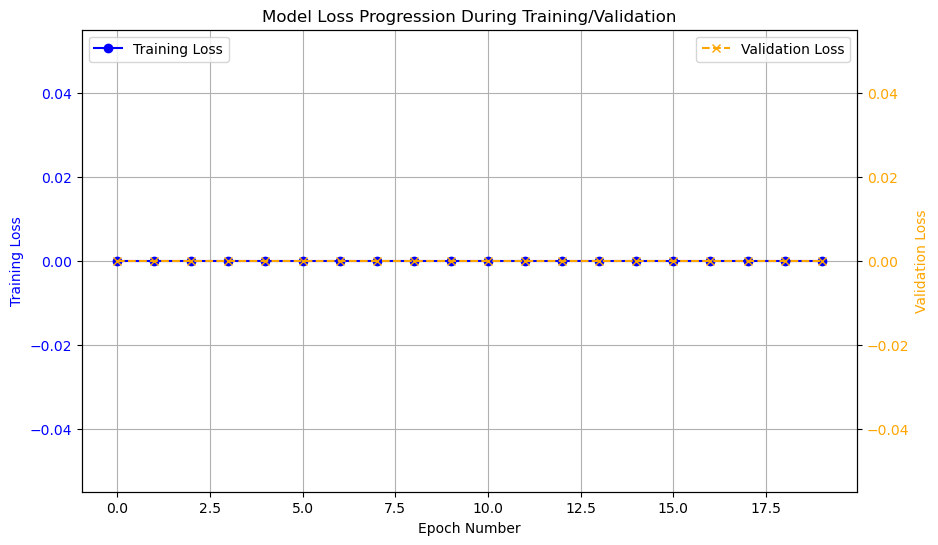

In [158]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss
ax1.plot(epochs_hist.history['loss'], label='Training Loss', color='blue', linestyle='-', marker='o')
ax1.set_xlabel('Epoch Number')
ax1.set_ylabel('Training Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for validation loss
ax2 = ax1.twinx()
ax2.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x')
ax2.set_ylabel('Validation Loss', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Model Loss Progression During Training/Validation')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Optional: Add grid for better readability
ax1.grid(True)

# Show plot
plt.show()


C:\Users\shail\AppData\Local\Temp\ipykernel_13628\997224568.py:1: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([min(min(epochs_hist.history['loss']), min(epochs_hist.history['val_loss'])),


(-0.05, 0.05)

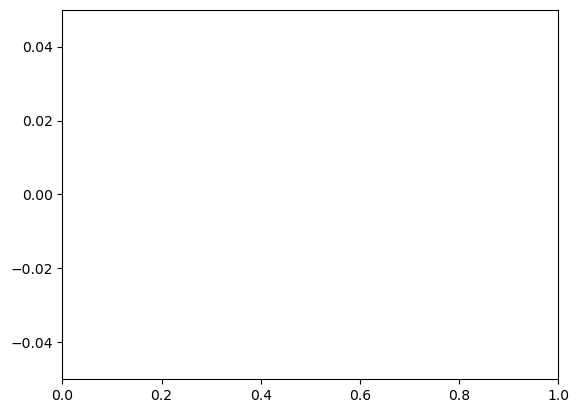

In [162]:
plt.ylim([min(min(epochs_hist.history['loss']), min(epochs_hist.history['val_loss'])),
          max(max(epochs_hist.history['loss']), max(epochs_hist.history['val_loss']))])


In [164]:
import numpy as np

losses = np.array(epochs_hist.history['loss'])
val_losses = np.array(epochs_hist.history['val_loss'])
print(np.isnan(losses).any(), np.isnan(val_losses).any())  # Check for NaN values
print(np.isinf(losses).any(), np.isinf(val_losses).any())  # Check for infinite values


False False
False False


In [166]:
print(len(epochs_hist.history['loss']))
print(len(epochs_hist.history['val_loss']))


20
20


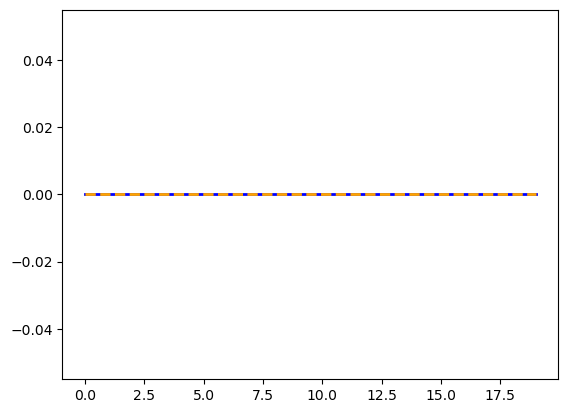

In [168]:
plt.plot(epochs_hist.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)


In [140]:
# 	Age,Fare,Family

X_Testing = np.array([[	38.0,71.2833,1]])

In [105]:
y_predict = model.predict(X_Testing)
y_predict.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(1, 1)

In [107]:
print('How many survived', y_predict[:,0])

How many survived [0.]


C:\Users\shail\AppData\Local\Temp\ipykernel_13628\997224568.py:1: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([min(min(epochs_hist.history['loss']), min(epochs_hist.history['val_loss'])),


(-0.05, 0.05)

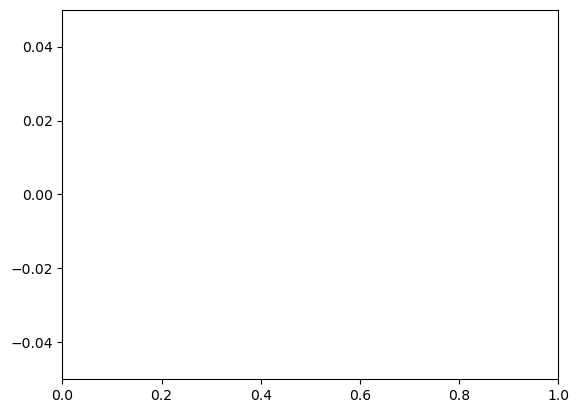